# Roller Coaster

#### Project Goals

This project goal is to create several data visualizations that will give us insights into the world of roller coasters.

## Project Content

1. Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provided in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. 

In [2]:
# 1 
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data
ranking_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
ranking_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
# inspecting the data
print(ranking_wood.head())
print(ranking_wood.info())
print(ranking_wood.describe(include='all'))
print(ranking_steel.head())
print(ranking_steel.info())
print(ranking_steel.describe(include='all'))
'''
1. 180 roller coasters are included in each ranking dataset.
2. 32 different roller coaster suppliers are included in the wood ranking. Whilest 15 different roller coaster suppliers are included in the steel ranking.
3. 2016-2018 include more ranking than other years such as 2013-2015.
'''

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    in

'\n1. 180 roller coasters are included in each ranking dataset.\n2. 32 different roller coaster suppliers are included in the wood ranking. Whilest 15 different roller coaster suppliers are included in the steel ranking.\n3. 2016-2018 include more ranking than other years such as 2013-2015.\n'

2. Create a function that will plot the ranking of a given roller coaster over time as a line.

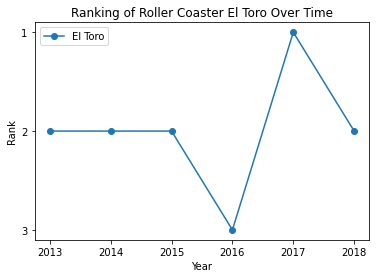

<Figure size 432x288 with 0 Axes>

In [3]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def ranking_time_line_graph(roller_coaster_name, park_name, df):
  df_temp = df[(df['Name'] == roller_coaster_name) & (df['Park'] == park_name)]
  plt.plot(df_temp['Year of Rank'], df_temp['Rank'], marker = 'o')
  ax = plt.subplot()
  ax.invert_yaxis()
  ax.set_yticks([3,2,1])
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Ranking of Roller Coaster {} Over Time'.format(roller_coaster_name))
  plt.legend([roller_coaster_name])
  plt.show()
  plt.clf()

# Create a plot of El Toro ranking over time
ranking_time_line_graph('El Toro', 'Six Flags Great Adventure', ranking_wood)

3. Create a function that will plot the ranking of two given roller coasters over time as lines.

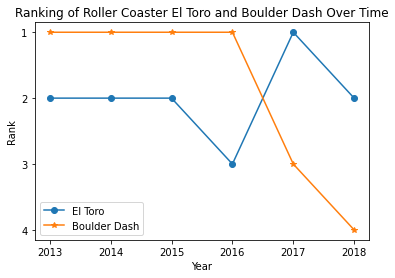

<Figure size 432x288 with 0 Axes>

In [4]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def ranking2_time_line_graph(roller_coaster_name1, park_name1, roller_coaster_name2, park_name2, df):
  df_temp1 = df[(df['Name'] == roller_coaster_name1) & (df['Park']==park_name1)]
  df_temp2 = df[(df['Name'] == roller_coaster_name2) & (df['Park']==park_name2)]
  plt.plot(df_temp1['Year of Rank'], df_temp1['Rank'], marker = 'o')
  plt.plot(df_temp2['Year of Rank'], df_temp2['Rank'], marker = '*')
  ax = plt.subplot()
  ax.invert_yaxis()
  ax.set_yticks([4,3,2,1])
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Ranking of Roller Coaster {} and {} Over Time'.format(roller_coaster_name1,roller_coaster_name2))
  plt.legend([roller_coaster_name1,roller_coaster_name2])
  plt.show()
  plt.clf()

# Create a plot of El Toro and Boulder Dash roller coasters
ranking2_time_line_graph('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', ranking_wood)

4. Create a function that will plot the ranking of the top `n` ranked roller coasters over time as lines.

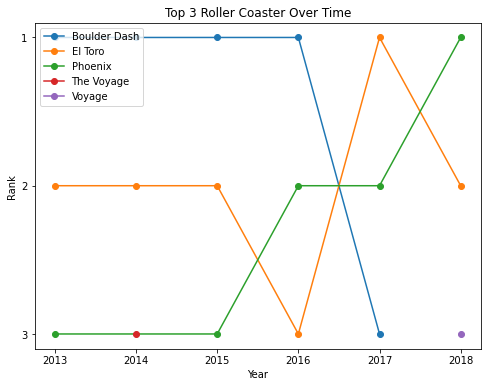

<Figure size 432x288 with 0 Axes>

In [9]:
# 4
# Create a function to plot top n rankings over time
def top_ranking(n, df):
  df_temp = df[df['Rank'] <= n]
  plt.figure(figsize=(8,6)) 
  for coaster in df_temp.Name.unique():
    name_rankings=df_temp[df_temp.Name == coaster]
    plt.plot(name_rankings['Year of Rank'], name_rankings['Rank'], label = coaster, marker = 'o')
  ax = plt.subplot()
  ax.invert_yaxis()
  ax.set_yticks(list(reversed(range(1,n+1))))
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Top {} Roller Coaster Over Time'.format(n))
  plt.legend()
  plt.show()
  plt.clf()

# Create a plot of top n rankings over time
top_ranking(3,ranking_wood)

5. Investigating the actual statistics of roller coasters, from [Captain Coaster](https://captaincoaster.com/en/) (a popular site for recording roller coaster information).

In [10]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())
print(roller_coasters.describe())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
             speed       height       length  num_inversions
count  1478.000000  1667.000000  1675.000000     2405.000000
mean     70.102842    26.725855

6. Create a function that plots a histogram of any numeric column of the roller coaster DataFrame.

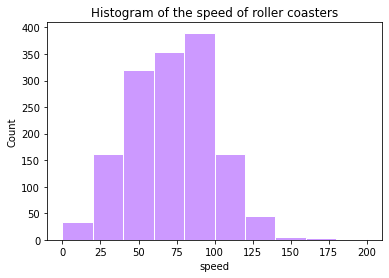

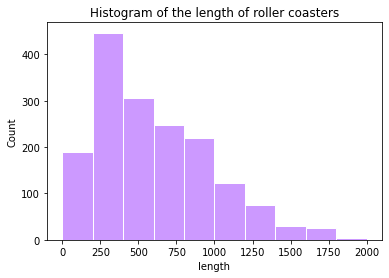

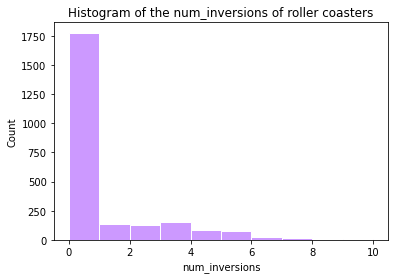

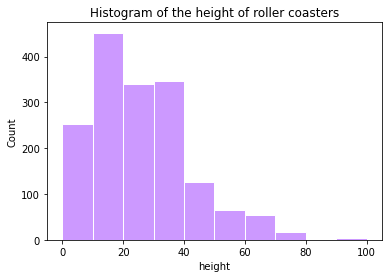

<Figure size 432x288 with 0 Axes>

In [14]:
# 6
# Create a function to plot histogram of column values
def plot_histogram(column, df, x_min, x_max):
  plt.hist(df[column].dropna(), bins=10, range = (x_min, x_max), color='#cc99ff', edgecolor='white')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Histogram of the {} of roller coasters'.format(column))
  plt.show()
  plt.clf()
# Create histogram of roller coaster speed
plot_histogram('speed', roller_coasters, 0,200)
# Create histogram of roller coaster length
plot_histogram('length', roller_coasters, 0, 2000)
# Create histogram of roller coaster number of inversions
plot_histogram('num_inversions', roller_coasters, 0, 10)
# Create a histogram of roller coaster height
plot_histogram('height', roller_coasters, 0, 100)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. 

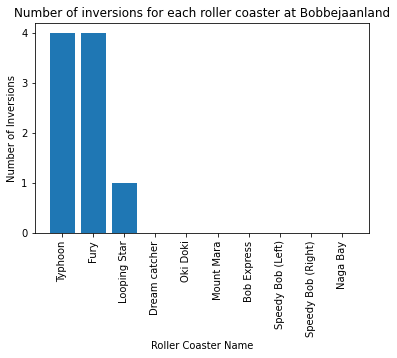

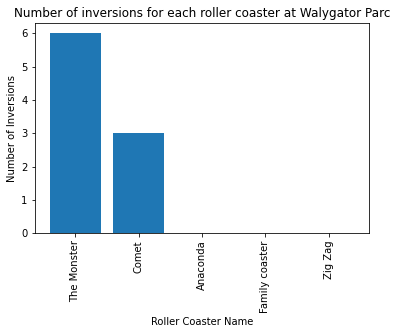

<Figure size 432x288 with 0 Axes>

In [16]:
# 7
# Create a function to plot inversions by coaster at park
def num_inversions_bar_chart(df, park_name):
  df_temp = df[df.park == park_name].sort_values('num_inversions', ascending=False)
  y_value=df_temp.num_inversions.dropna()
  y_min = int(y_value.min())
  y_max = int(y_value.max())
  x_label=df_temp.name.values
  plt.bar(range(len(y_value)), y_value)
  ax = plt.subplot()
  ax.set_xticks(range(len(y_value)))
  ax.set_xticklabels(x_label, rotation = 90)
  ax.set_yticks(range(y_min, y_max+1))
  plt.subplots_adjust(bottom=0.15)
  plt.xlabel('Roller Coaster Name')
  plt.ylabel('Number of Inversions')
  plt.title('Number of inversions for each roller coaster at {}'.format(park_name))
  plt.show()
  plt.clf()
    
# Create barplot of inversions by roller coasters
num_inversions_bar_chart(roller_coasters, 'Bobbejaanland')
num_inversions_bar_chart(roller_coasters, 'Walygator Parc')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`).

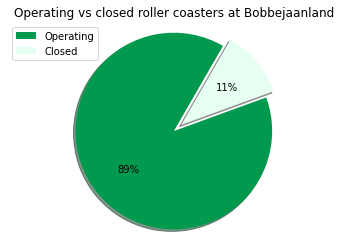

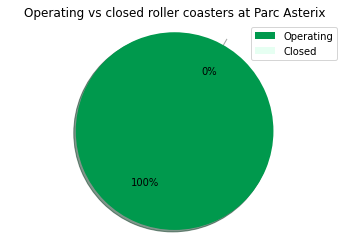

<Figure size 432x288 with 0 Axes>

In [19]:
# 8
# Create a function to plot a pie chart of status.operating
def status_pie_chart(df, park_name):
  df_temp = df[df.park == park_name]
  data=df_temp.status.value_counts()
  if 'status.operating' not in data.index:
    operating=0
  else:
    operating=data['status.operating']
  if 'status.closed.definitely' not in data.index:
    closed=0
  else:
    closed=data['status.closed.definitely']
  wedge_sizes = [operating, closed]
  status = ['Operating', 'Closed']
  plt.pie(wedge_sizes, autopct='%1.0f%%', shadow = True,explode=[0.1,0], colors=['#00994d','#e6fff2'], startangle=60)
  plt.axis('equal')
  plt.legend(status)
  plt.title('Operating vs closed roller coasters at {}'.format(park_name))
  plt.show()
  plt.clf()

# Another way to write the function without if statements
def status_pie_chart_better(df, park_name):
  df_temp = df[df.park == park_name]
  operating = df_temp[df_temp.status == 'status.operating']
  closed = df_temp[df_temp.status == 'status.closed.definitely']
  wedge_sizes = [len(operating), len(closed)]
  status = ['Operating', 'Closed']
  plt.pie(wedge_sizes, autopct='%1.0f%%', shadow = True,explode=[0.1,0], colors=['#00994d','#e6fff2'], startangle=60)
  plt.axis('equal')
  plt.legend(status)
  plt.title('Operating vs closed roller coasters at {}'.format(park_name))
  plt.show()
  plt.clf()
# Create pie chart of roller coasters
status_pie_chart(roller_coasters, 'Bobbejaanland')
status_pie_chart_better(roller_coasters, 'Parc Asterix')

9. Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame.

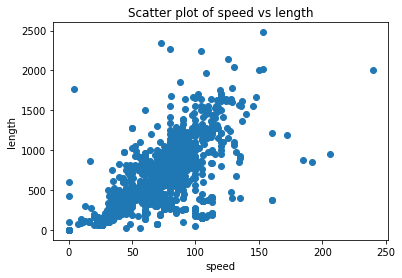

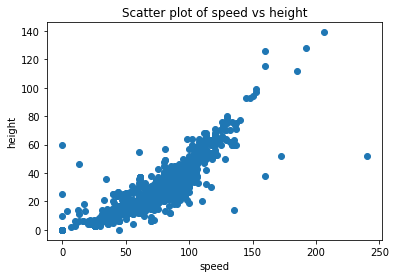

<Figure size 432x288 with 0 Axes>

In [24]:
# 9
# Create a function to plot scatter of any two columns
def scatter(df, column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot of {} vs {}'.format(column1, column2))
  plt.show()
  plt.clf()

# Create a scatter plot of roller coaster length by speed
scatter(roller_coasters, 'speed', 'length')
# Create a function to plot scatter of speed vs height
def scatter_height(df, column):
  plt.scatter(df[column][df['height'] <=140], df['height'][df['height'] <=140])
  plt.xlabel(column)
  plt.ylabel('height')
  plt.title('Scatter plot of {} vs height'.format(column))
  plt.show()
  plt.clf()
# Create a scatter plot of roller coaster height by speed
scatter_height(roller_coasters, 'speed')

10. What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?

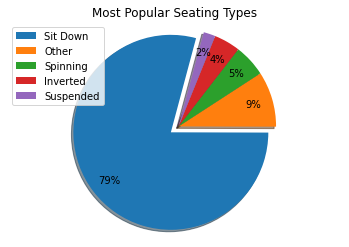

<Figure size 432x288 with 0 Axes>

In [29]:
# Looking at the most popular seating types
seating_types = roller_coasters.seating_type.copy()
seating_types_counts = seating_types.value_counts()
mask = seating_types.isin(seating_types_counts[seating_types_counts < 50].index)
seating_types.loc[mask] = 'Other'
#print(seating_types.value_counts())
wedge_size = seating_types.value_counts().values
categories=seating_types.value_counts().index
plt.pie(wedge_size, autopct='%1.0f%%', startangle=75, pctdistance=.8, shadow=True, explode=[0.1,0,0,0,0])
plt.axis('equal')
plt.title('Most Popular Seating Types')
plt.legend(categories)
plt.show()
plt.clf()

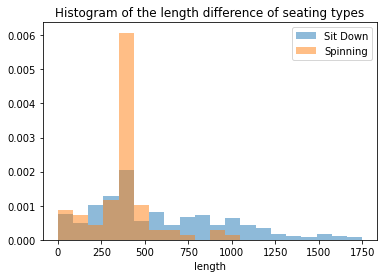

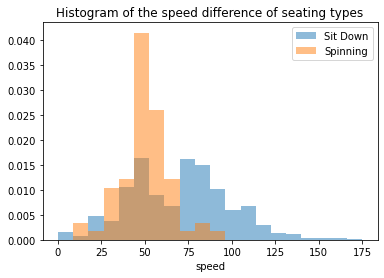

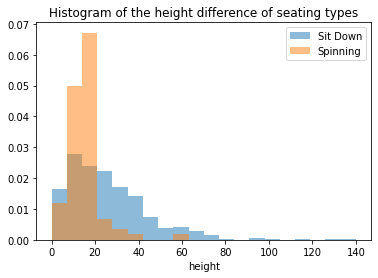

'Seating type as Sit Down tends to result in higher/faster/longer roller coasters (maybe because it is safer and easier)'

<Figure size 432x288 with 0 Axes>

In [42]:
# Creating a function to look at the association between any two seating types and other quantitative variables such as height/lenght/speed
def seating_type_quant_hist(df, quant_column, seating_type1, seating_type2, x_max):
  data1 = df[df.seating_type == seating_type1][quant_column].dropna()
  data2 = df[df.seating_type == seating_type2][quant_column].dropna()
  plt.hist(data1, bins=20, range=(0, x_max), alpha=0.5, label=seating_type1, density=True)
  plt.hist(data2, bins=20, range=(0, x_max), alpha=0.5, label=seating_type2, density=True)
  plt.legend()
  plt.title('Histogram of the {} difference of seating types'.format(quant_column))
  plt.xlabel(quant_column)
  plt.show()
  plt.clf()

seating_type_quant_hist(roller_coasters, 'length', 'Sit Down', 'Spinning', 1750)
seating_type_quant_hist(roller_coasters, 'speed', 'Sit Down', 'Spinning', 175)
seating_type_quant_hist(roller_coasters, 'height', 'Sit Down', 'Spinning', 140)

'''Seating type as Sit Down tends to result in higher/faster/longer roller coasters (maybe because it is safer and easier)'''

11. Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?

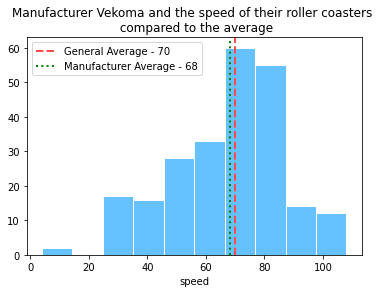

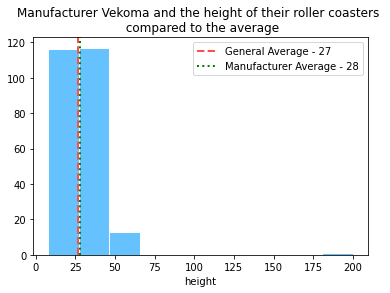

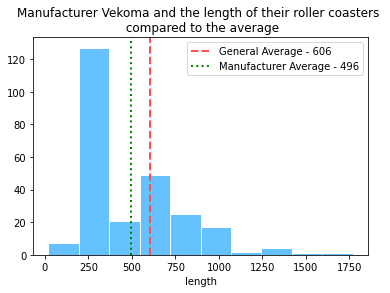

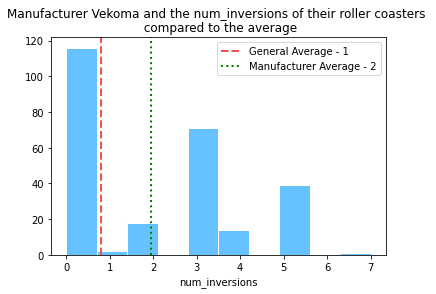

<Figure size 432x288 with 0 Axes>

In [58]:
#looking at manufacturer and their quantitative specialties
def manufacturer_specialties_qant(df, manufacturer, quant_column):
  avg_quant = df[quant_column].dropna().mean()
  df_temp = df[df.manufacturer == manufacturer][quant_column].dropna()
  plt.hist(df_temp, color='#66c2ff', edgecolor='white')
  plt.xlabel(quant_column)
  plt.axvline(avg_quant, color='#ff4d4d', linewidth = 2, linestyle='--', label='General Average - {:1.0f}'.format(avg_quant))
  plt.axvline(df_temp.mean(), color='#008000', linewidth = 2, linestyle=':', label='Manufacturer Average - {:1.0f}'.format(df_temp.mean()))
  plt.legend()
  plt.title('Manufacturer {} and the {} of their roller coasters \n compared to the average'.format(manufacturer, quant_column) )
  plt.show()
  plt.clf()

manufacturer_specialties_qant(roller_coasters, 'Vekoma', 'speed')
manufacturer_specialties_qant(roller_coasters, 'Vekoma', 'height')
manufacturer_specialties_qant(roller_coasters, 'Vekoma', 'length')
manufacturer_specialties_qant(roller_coasters, 'Vekoma', 'num_inversions')

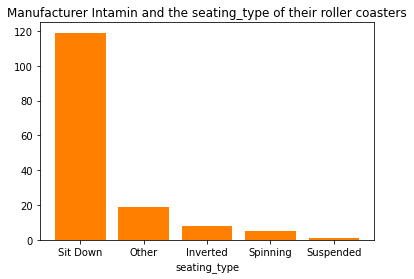

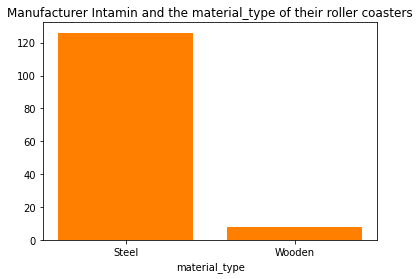

<Figure size 432x288 with 0 Axes>

In [65]:
#looking at manufacturer and their categorical specialties
def manufacturer_specialties_cat(df, manufacturer, cat_column):
  df_temp = df[df.manufacturer == manufacturer]
  counts = df_temp[cat_column][df_temp[cat_column]!='na'].value_counts()
  plt.bar(range(len(counts)), counts, color='#ff8000')
  plt.xlabel(cat_column)
  ax = plt.subplot()
  ax.set_xticks(range(len(counts)))
  ax.set_xticklabels(counts.index)
  plt.title('Manufacturer {} and the {} of their roller coasters'.format(manufacturer, cat_column) )
  plt.show()
  plt.clf()

manufacturer_specialties_cat(roller_coasters, 'Intamin', 'seating_type')
manufacturer_specialties_cat(roller_coasters, 'Intamin', 'material_type')

12. Do amusement parks have any specialties?

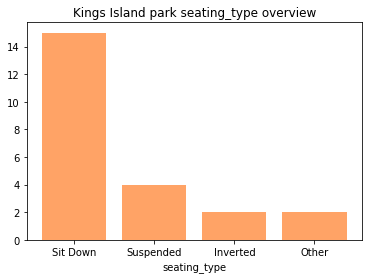

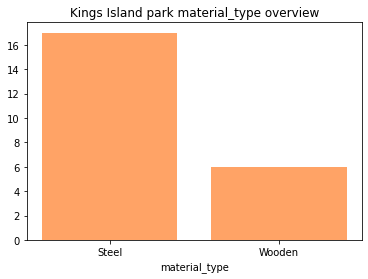

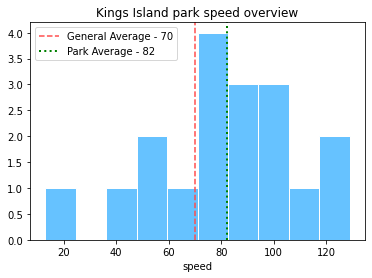

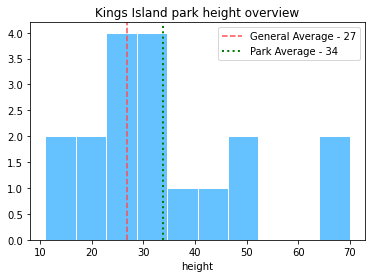

<Figure size 432x288 with 0 Axes>

In [70]:
def park_specialties(df, park_name, column):
  df_temp=df[df.park==park_name]
  if column == 'material_type' or column == 'seating_type':
    counts = df_temp[column].value_counts()
    plt.bar(range(len(counts.index)), counts.values, color='#ffa366')
    ax = plt.subplot()
    ax.set_xticks(range(len(counts.index)))
    ax.set_xticklabels(counts.index) 
  else:
    avg_value = df[column].mean()
    plt.hist(df_temp[column].dropna(), color='#66c2ff', edgecolor='white')
    plt.axvline(avg_value, color='#ff4d4d', linestyle='--', label='General Average - {:1.0f}'.format(avg_value))
    plt.axvline(df_temp[column].mean(), color='#008000', linestyle=':', linewidth=2, label='Park Average - {:1.0f}'.format(df_temp[column].mean()))
    plt.legend()
  plt.xlabel(column)
  plt.title('{} park {} overview'.format(park_name, column))
  plt.show()
  plt.clf()

park_specialties(roller_coasters, 'Kings Island', 'seating_type')
park_specialties(roller_coasters, 'Kings Island', 'material_type')
park_specialties(roller_coasters, 'Kings Island', 'speed')
park_specialties(roller_coasters, 'Kings Island', 'height')